# TF2 심층신경망 모델 - Fashion MNIST (실습)

Fully Connected Layer (Dense)를 활용한 이미지 분류 (Image Classification)

## 확인

1. GPU 옵션 켜져 있는지 확인할 것!!! (수정 - 노트설정 - 하드웨어설정 (GPU))

## 순서

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

## 문제

Fashion MNIST 데이터 셋에 대한 분류기 생성
테스트는 10 개의 클래스를 분류 할 것으로 예상하고

입력 모양은 Fashion MNIST 데이터 세트의 기본 크기 여야합니다.28x28 단색. 

데이터 크기를 조정하지 마십시오. input_shape는
(28,28)을 입력 모양으로 만 사용합니다. 

------------------------------------

# 실습

## STEP 1. import

In [49]:
import urllib.request
import zipfile
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

## STEP 2. 전처리 (pre-processing)

**tf.keras.datasets** 에는 다양한 샘플 데이터를 제공해줍니다.


[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

* **fashion_mnist**: Fashion-MNIST 옷(패션) 데이터 셋

* **mnist**: MNIST 손글씨 데이터 셋

데이터 셋을 **로드** 합니다. (mnist)

[코드]

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

데이터 셋 로드: 
* **mnist.load_data()**
* **fashion_mnist.load_data()**

데이터 셋을 불러와, train / validation 세트를 구성합니다.

[코드] 

In [60]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

정상적으로 로드되었는지, **확인**합니다. 

In [61]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [62]:
y_train.shape, y_valid.shape

((60000,), (10000,))

**데이터셋 시각화**

TypeError: ignored

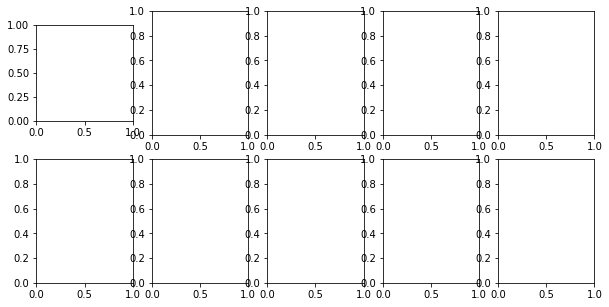

In [65]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title('No. %02d' % y_train[i], fontsize=18)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

**이미지 정규화 (Normalization)**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화 해 줍니다.
* x_train, x_valid 에 대해서만 정규화합니다.

정규화(Normalization) 전의 최소값(min), 최대값(max)을 확인합니다.

In [31]:
x_train.min(), x_train.max()

(0, 255)

[코드]

In [64]:
x_train = x_train / 255
x_valid = x_valid / 255

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

정규화 후 최소값/최대값 확인

In [33]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [66]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

## STEP 3. 모델 정의 (Sequential)

이제 Modeling을 할 차례입니다.

`Sequential` 모델 안에서 층을 깊게 쌓아 올려 주면 됩니다.

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못합니다. Flatten 레이어로 2D -> 1D로 변환해주세요
2. 깊은 출력층과 더 많은 Layer를 쌓습니다.
3. Dense Layer에 `activation='relu'`를 적용합니다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 합니다.


[코드]

In [67]:
model = Sequential([
    # Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (28,28,1)으로 지정합니다.
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2), 
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2), 
    # 2D -> 1D로 변환을 위하여 Flatten 합니다.
    Flatten(), 
    # 과적합 방지를 위하여 Dropout을 적용합니다.
    Dropout(0.3),
    Dense(1024, activation='relu'),
    # 과적합 방지를 위하여 Dropout을 적용합니다.
    Dropout(0.3),
    Dense(512, activation='relu'),
    # Classification을 위한 Softmax 
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰줍니다 (3개), activation도 잊지마세요!
    Dense(10, activation='softmax'),
])

모델에 대한 **요약**을 확인합니다.

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dropout_6 (Dropout)         (None, 3200)             

## STEP 4. 컴파일 (compile)

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`는 무엇을 지정하면 좋을까요? (`categorical_crossentropy` / `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

[코드]

In [69]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## STEP 5. ModelCheckpoint

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

[코드]

In [70]:
checkpoint_path = "lab_cp.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

## STEP 6. 학습 (fit)

1. `validation_data`를 반드시 지정합니다.
2. `epochs`을 적절하게 지정합니다.
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정합니다.

[코드]

In [71]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
1863/1875 [============================>.] - ETA: 0s - loss: 0.4149 - acc: 0.8471
Epoch 1: val_loss improved from inf to 0.33243, saving model to lab_cp.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4145 - acc: 0.8473 - val_loss: 0.3324 - val_acc: 0.8781
Epoch 2/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.2781 - acc: 0.8961
Epoch 2: val_loss improved from 0.33243 to 0.29397, saving model to lab_cp.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - acc: 0.8961 - val_loss: 0.2940 - val_acc: 0.8894
Epoch 3/20
1867/1875 [============================>.] - ETA: 0s - loss: 0.2347 - acc: 0.9120
Epoch 3: val_loss improved from 0.29397 to 0.27181, saving model to lab_cp.ckpt
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2348 - acc: 0.9118 - val_loss: 0.2718 - val_acc: 0.8991
Epoch 4/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.2044 - acc: 0.9231
Epoch 4: val_loss did n

## STEP 7. 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 합니다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없습니다.

[코드]

In [73]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)
model.evaluate(x_valid, y_valid)



313/313 [==============================] - 1s 4ms/step - loss: 0.2587 - acc: 0.9076


[0.2587042450904846, 0.9075999855995178]

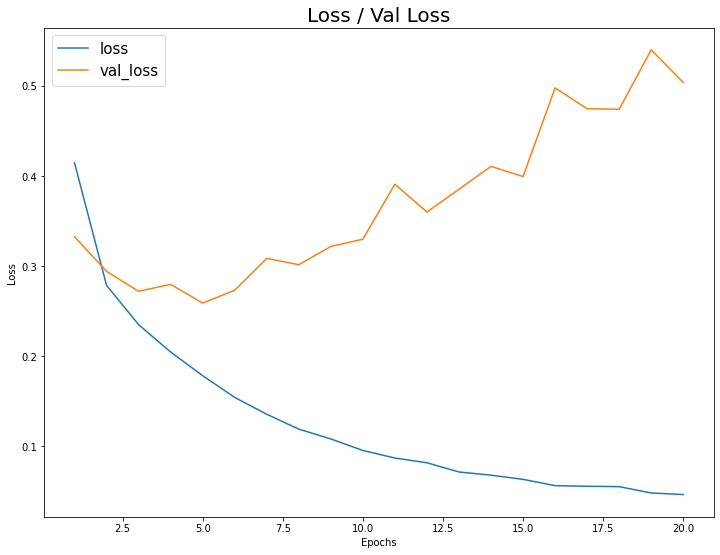

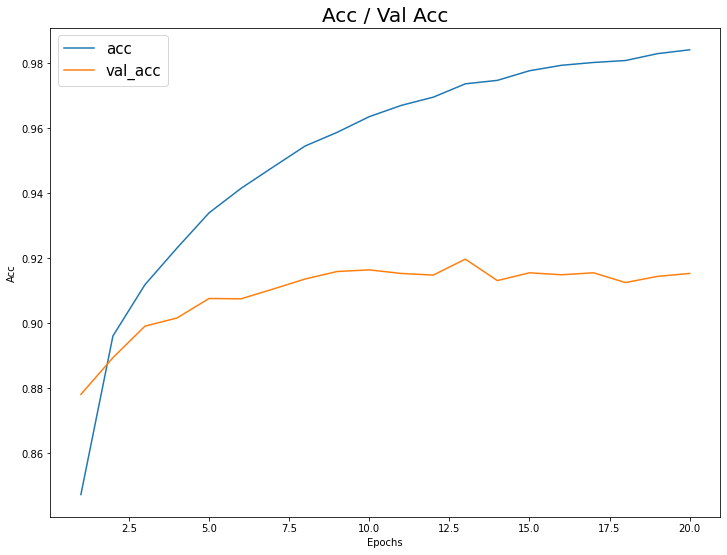

In [74]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()